In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata as ad
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# import matplotlib
from matplotlib.colors import rgb2hex
from colorcet import glasbey
# import seaborn as sns

import shapely
import shapely.plotting as splot

import scanpy as sc

import ccf_plots as cplots
import abc_load as abc

%matplotlib inline

In [3]:
# suppress FutureWarning warnings (targeting AnnData & Seaborn)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load TH+ZI subset of ABC atlas

In [4]:
version = '20230830'
adata_th_zi = abc.load_adata(version=version, transform='log2', 
                             subset_to_TH_ZI=True, with_metadata=True, 
                             flip_y=False, # ccf_plots module expects unflipped y axis
                             round_z=True,
                             with_colors=True) # colors required for displaying by cell type

In [5]:
adata_th_zi_neurons = abc.filter_adata_by_class(adata_th_zi, filter_nonneuronal=True,
                                                filter_midbrain=True)

In [6]:
# grab the obs df
obs_th_neurons = adata_th_zi_neurons.obs.copy()

In [7]:
# load in rasterized CCF volumes
ccf_polygons = abc.get_ccf_labels_image(resampled=True).astype(int)

### preprocessing

In [8]:
# # rename the reconstructed coords to be compatible with ccf_plots.py module
# rename = {
#           'x_reconstructed':'cirro_x',
#           'y_reconstructed':'cirro_y',
#           'brain_section_label':'section',
#           'parcellation_substructure':'CCF_acronym'
#          }
# obs_th_neurons = obs_th_neurons.rename(columns=rename)
section_col = 'z_reconstructed'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'
ccf_label = 'parcellation_substructure'

In [9]:
# # helps plotting etc by trimming categories
# for col in obs_th_neurons.columns:
#     if isinstance(obs_th_neurons[col].dtype, pd.CategoricalDtype):
#         obs_th_neurons[col] = obs_th_neurons[col].cat.remove_unused_categories()

In [10]:
sections = sorted(obs_th_neurons[section_col].unique())

# pick 3 example sections
sections_3 = [6.4, 7.2, 8.0]

## view thalamus subset with subclass labels

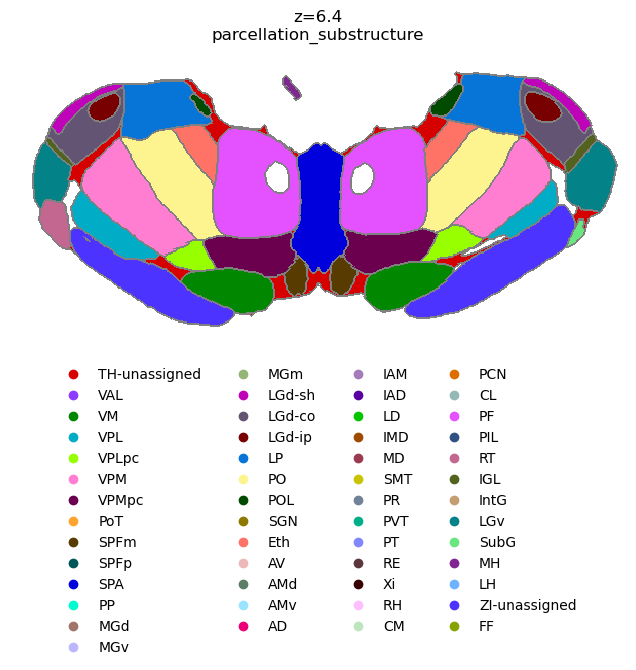

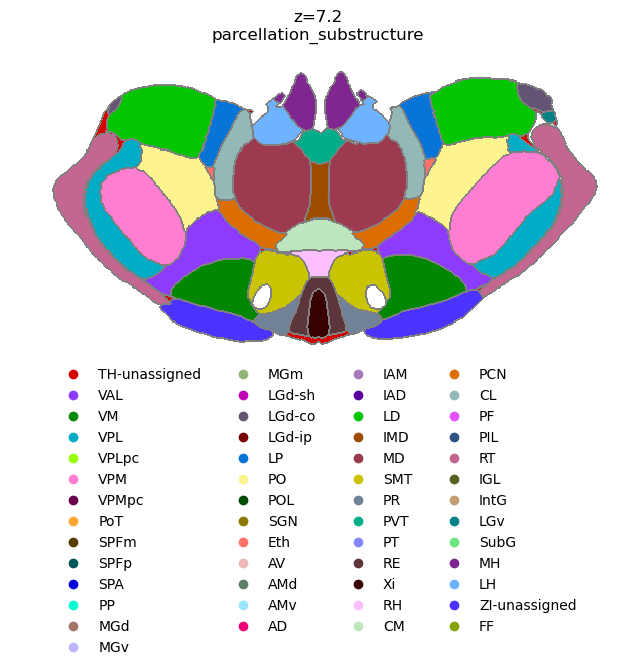

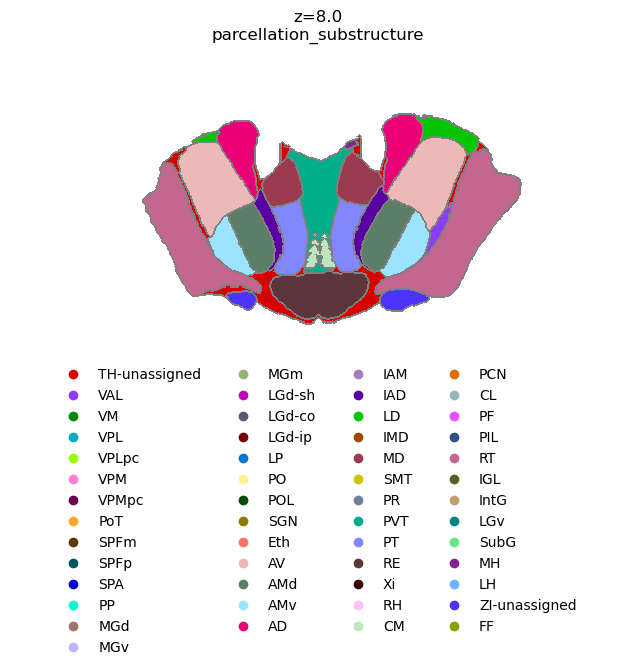

In [11]:
section_col = 'z_reconstructed'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'
ccf_label = 'parcellation_substructure'
# obs_th_neurons['z_section']
cplots.plot_ccf_overlay(obs_th_neurons.iloc[[],:], # no foreground cells; just the ccf shapes
                        ccf_polygons, sections=sections_3, point_hue=ccf_label, 
                        highlight='all', legend='ccf',
                        section_col=section_col, x_col=x_coord_col, y_col=y_coord_col,
                        bg_shapes=False, min_group_count=0, 
                        axes=False)

In [12]:
subclasses_all = obs_th_neurons['subclass'].value_counts().loc[lambda x: x>100]
print(len(subclasses_all))

supertypes_all = obs_th_neurons['supertype'].value_counts().loc[lambda x: x>10]
print(len(supertypes_all))

18
87


In [13]:
obs_th_neurons.loc[lambda df: df['subclass'].isin(subclasses_all.index), 'class'].value_counts().loc[lambda x: x>0]

class
18 TH Glut       58565
12 HY GABA       16482
17 MH-LH Glut     5762
Name: count, dtype: int64

In [14]:
obs_th_neurons.loc[lambda df: df['subclass'].isin(subclasses_all.index), 'supertype'].unique().shape[0]

90

In [15]:
obs_th_neurons.loc[lambda df: df['subclass'].isin(subclasses_all.index), 'cluster'].unique().shape[0]

369

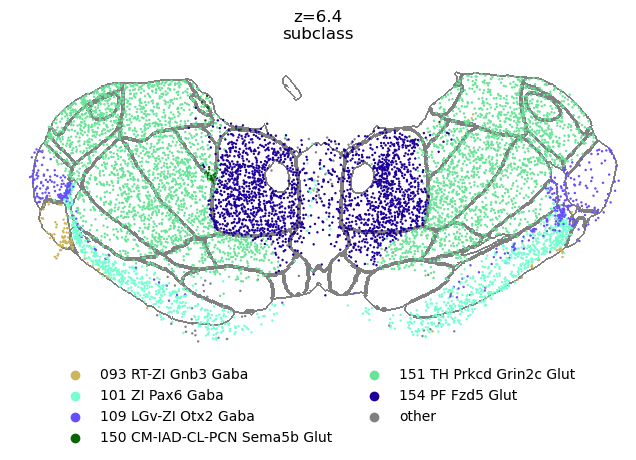

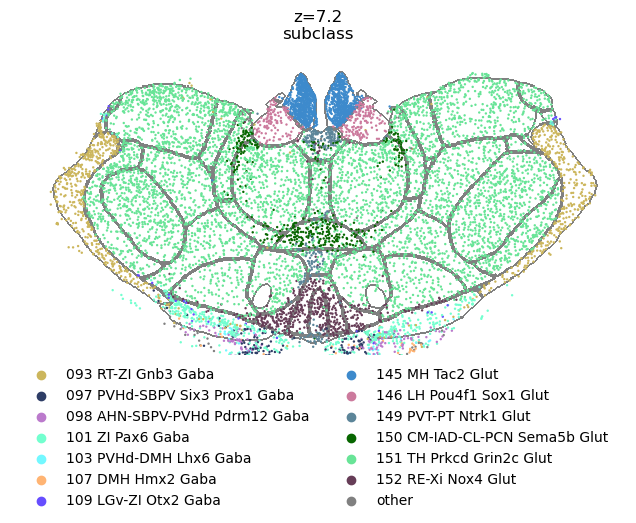

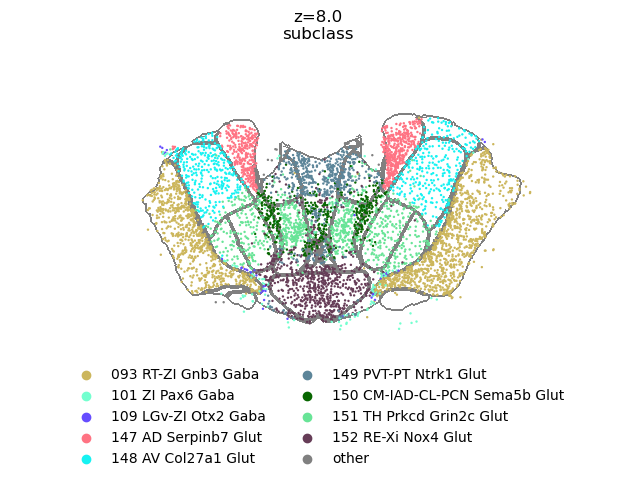

In [16]:
tax_level = 'subclass'
point_palette = dict(zip(obs_th_neurons[tax_level].unique(),
                         obs_th_neurons[tax_level+'_color'].unique()))

obs = obs_th_neurons.loc[lambda df: df['subclass'].isin(subclasses_all.index)]
cplots.plot_ccf_overlay(obs, ccf_polygons, 
                        # bg_cells=obs_th_neurons, # skip the background cells - it just makes it look like a grey 3D shadow on each dot
                        point_hue='subclass', sections=sections_3,
                        shape_palette='dark_outline', 
                        point_palette=point_palette, legend='cells', 
                        highlight='all', section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col,
                        min_group_count=30, s=3)

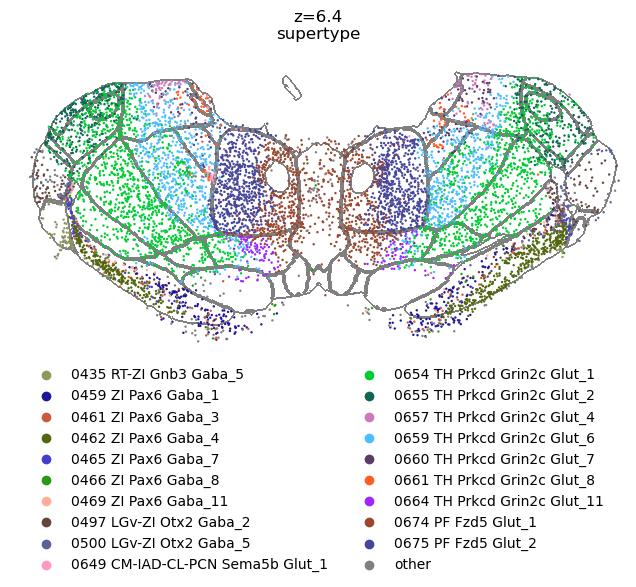

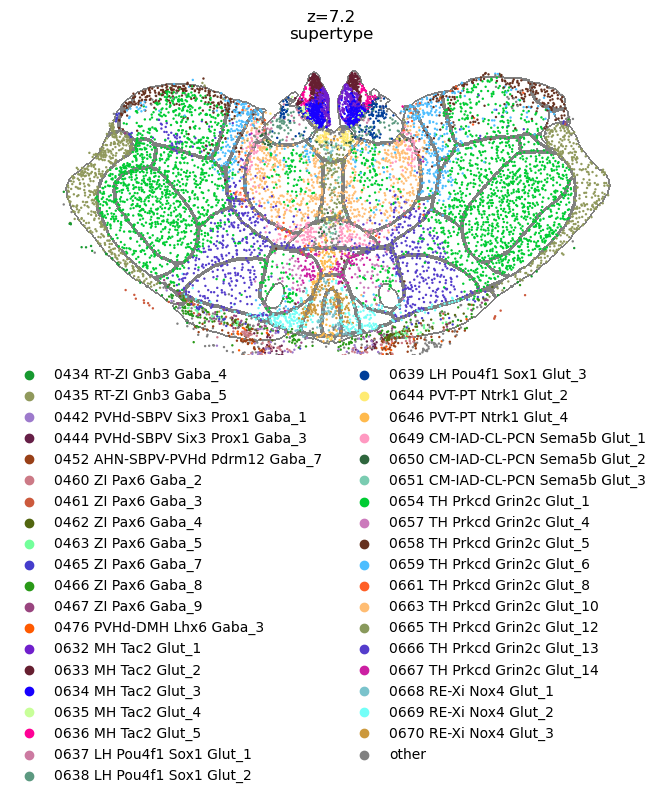

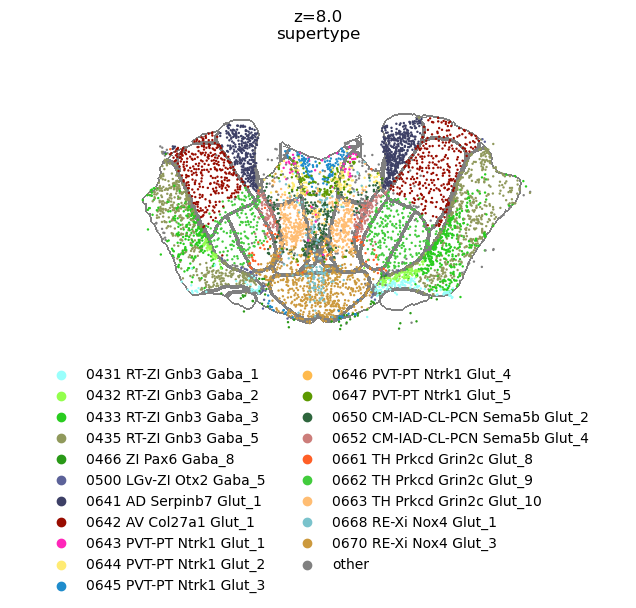

In [17]:
tax_level = 'supertype'
point_palette = dict(zip(obs_th_neurons[tax_level].unique(),
                         obs_th_neurons[tax_level+'_color'].unique()))

obs = obs_th_neurons.loc[lambda df: df['subclass'].isin(subclasses_all.index)]
cplots.plot_ccf_overlay(obs, ccf_polygons, 
                        #bg_cells=obs_th_neurons, # skip the background cells - it just makes it look like a grey 3D shadow on each dot
                        point_hue='supertype', sections=sections_3,
                        shape_palette='dark_outline', 
                        point_palette=point_palette, legend='cells', 
                        highlight='all', section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col,
                        min_group_count=30,s=3)

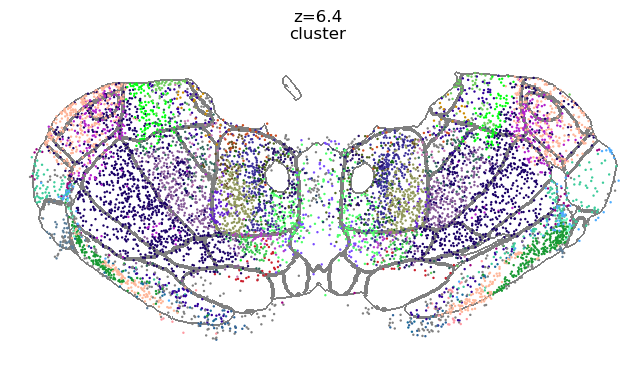

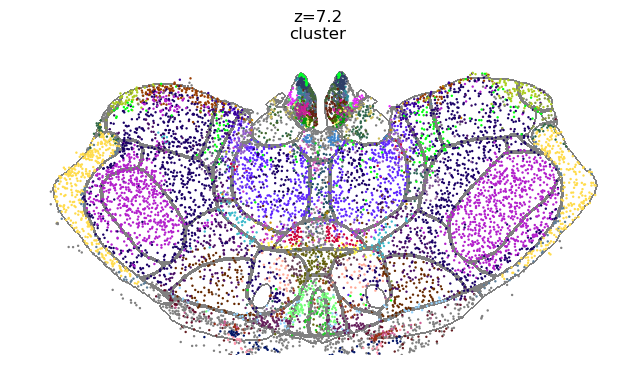

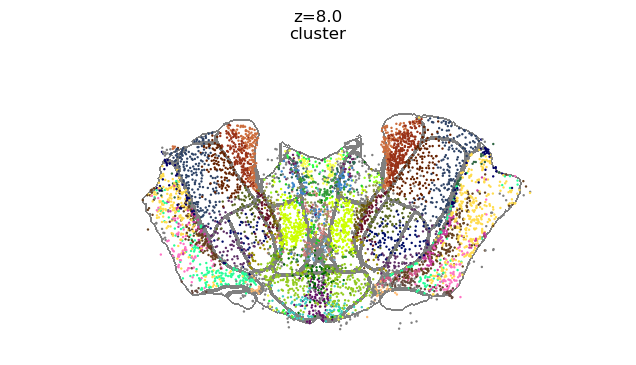

In [18]:
tax_level = 'cluster'
point_palette = dict(zip(obs_th_neurons[tax_level].unique(),
                         obs_th_neurons[tax_level+'_color'].unique()))

obs = obs_th_neurons.loc[lambda df: df['subclass'].isin(subclasses_all.index)]
cplots.plot_ccf_overlay(obs, ccf_polygons, 
                        #bg_cells=obs_th_neurons, # skip the background cells - it just makes it look like a grey 3D shadow on each dot
                        point_hue='cluster', sections=sections_3,
                        shape_palette='dark_outline', 
                        point_palette=point_palette, legend=None, 
                        # highlight='all', 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col,
                        min_group_count=30,s=3)

## examples

### ANT

#### supertypes

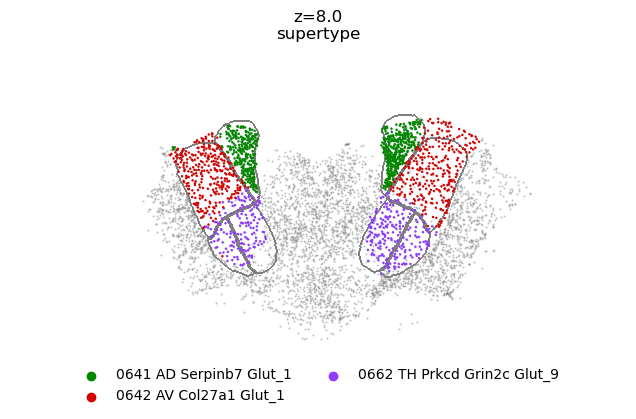

In [19]:
anterior_sec = 8.0
clusters = [str(x) for x in list(range(2613, 2616+1)) + list(range(2674, 2676+1))]
obs = obs_th_neurons.loc[lambda df: df['cluster'].str[:4].isin(clusters)]

nuclei = ['AD', 'AV', 'AMd', 'AMv']
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='supertype', sections=[anterior_sec],
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

#### clusters

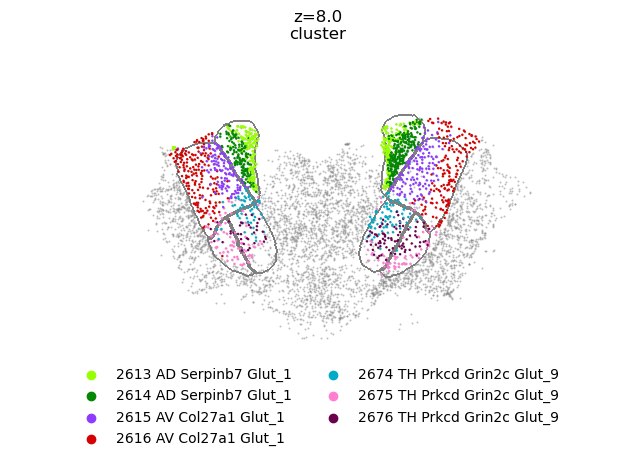

In [20]:
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='cluster', sections=[anterior_sec],
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

### VAL + VM (clusters)

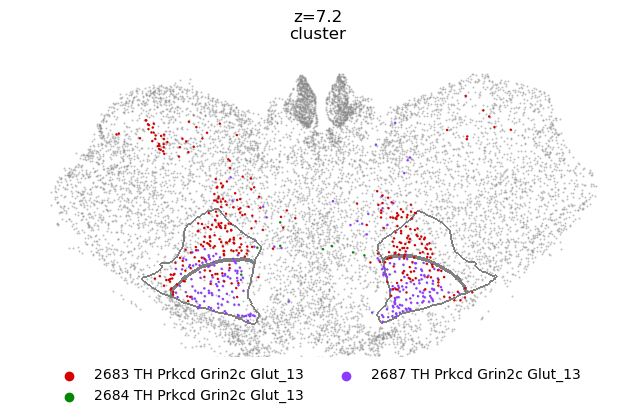

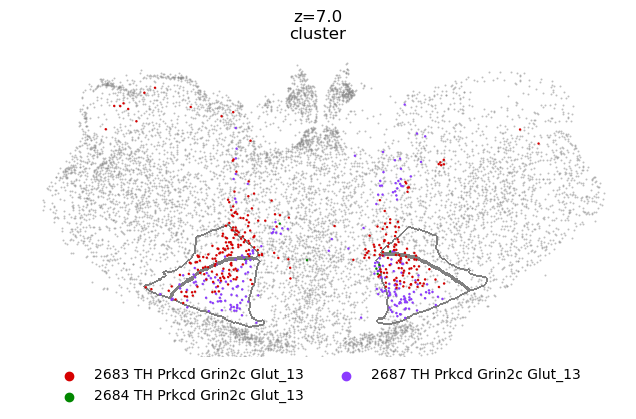

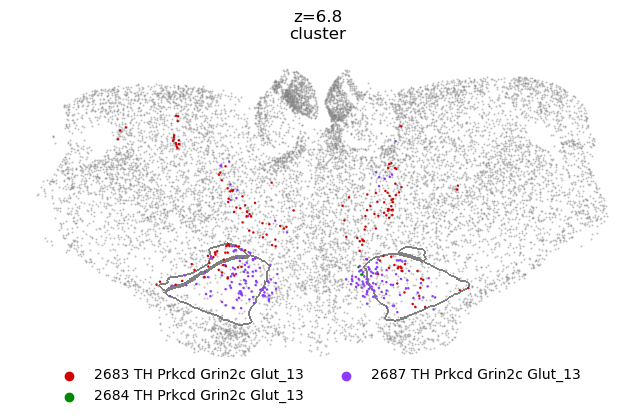

In [21]:
# VAL + VM
sections = [7.2, 7.0, 6.8]
clusters = ['2683','2684','2687']
obs = obs_th_neurons.loc[lambda df: df['cluster'].str[:4].isin(clusters)]
nuclei = ['VM','VAL']
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='cluster', sections=sections,
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

### PVT

#### subclass

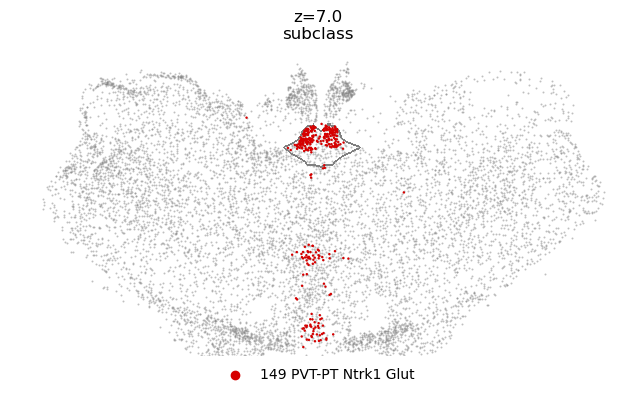

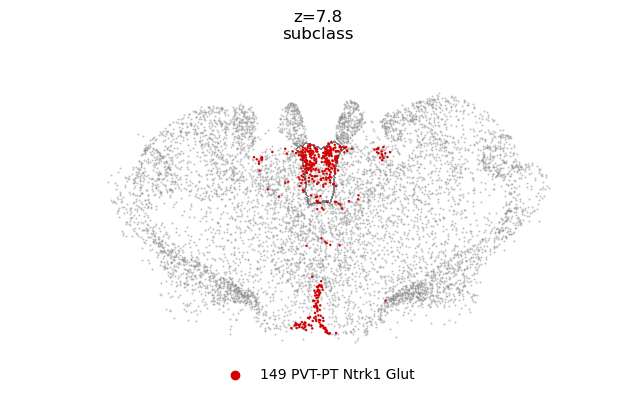

In [22]:
pvt_sections = [7.0, 7.8]
nuclei = ['PVT']
subclasses = nuclei
obs = obs_th_neurons.loc[np.any([obs_th_neurons['subclass'].str.contains(x).values for x in subclasses], axis=0), :]
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='subclass', sections=pvt_sections,
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

#### supertypes

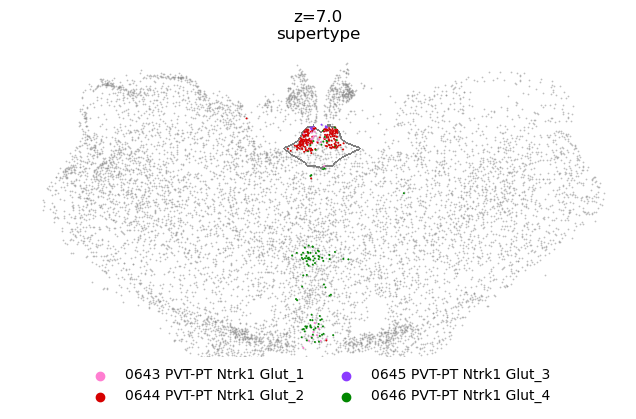

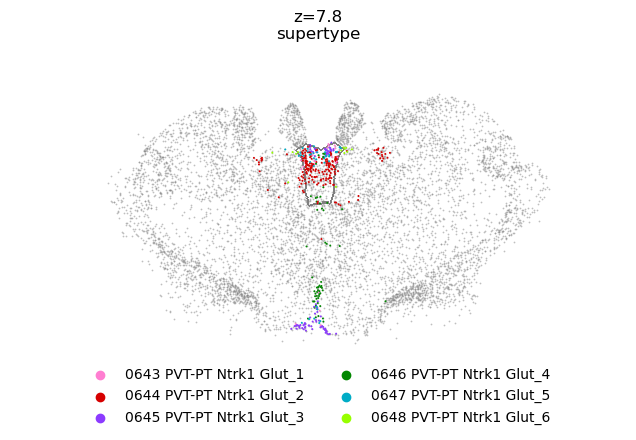

In [23]:
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='supertype', sections=pvt_sections,
                        shape_palette='dark_outline',
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

### RT

#### subclass

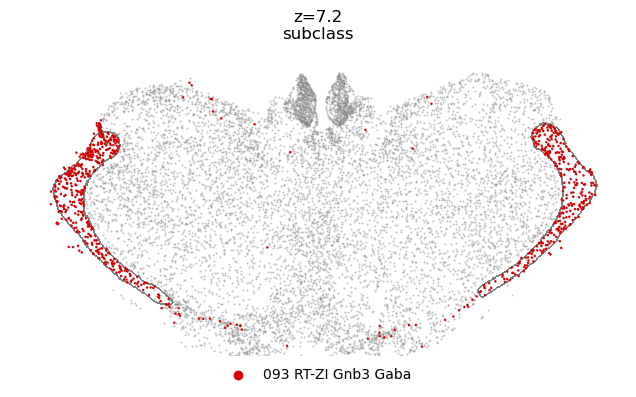

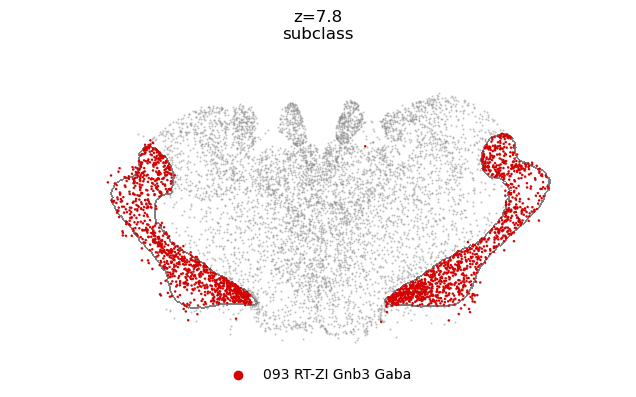

In [24]:
# RT
rt_sections = [7.2, 7.8]
nuclei = ['RT'] #,'ZI-unassigned'
subclasses = ['RT-ZI']
obs = obs_th_neurons.loc[np.any([obs_th_neurons['subclass'].str.contains(x).values for x in subclasses], axis=0), :]

#subclass
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='subclass', sections=rt_sections,
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

#### supertypes

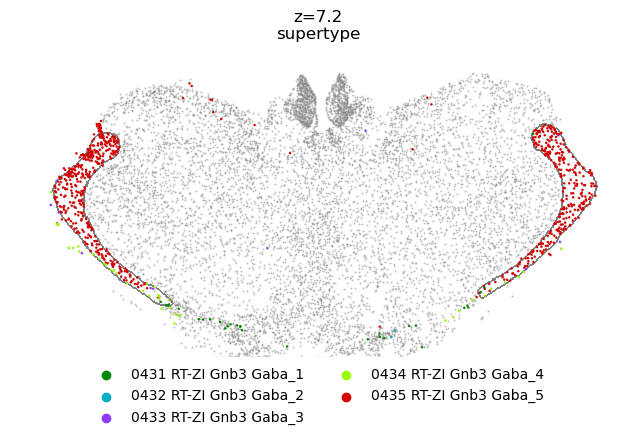

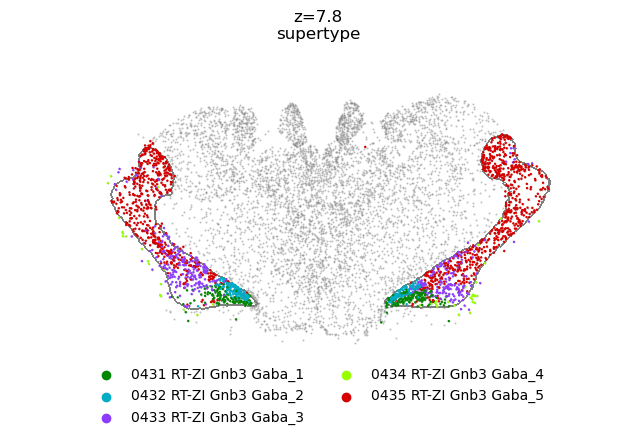

In [25]:
#supertype
cplots.plot_ccf_overlay(obs, ccf_polygons, bg_cells=obs_th_neurons, 
                        point_hue='supertype', sections=rt_sections,
                        shape_palette='dark_outline', s=3,
                        ccf_names=nuclei, legend='cells', bg_shapes=False, 
                        section_col=section_col, 
                        x_col=x_coord_col, y_col=y_coord_col)

# Investigate other cluster-nucleus groups

In [26]:
nuclei_df = pd.read_csv("resources/prong1_cluster_annotations_by_nucleus.csv", 
                        index_col=0)

In [27]:
def get_obs_from_annotated_clusters(name, adata, nuclei_df):
    clusters = nuclei_df.loc[name, 'cluster_alias'].split(', ')
    obs = adata.obs[adata.obs['cluster_alias'].isin(clusters)]
    return obs

In [28]:
section_col = 'z_reconstructed'
x_coord_col = 'x_reconstructed'
y_coord_col = 'y_reconstructed'

## PT

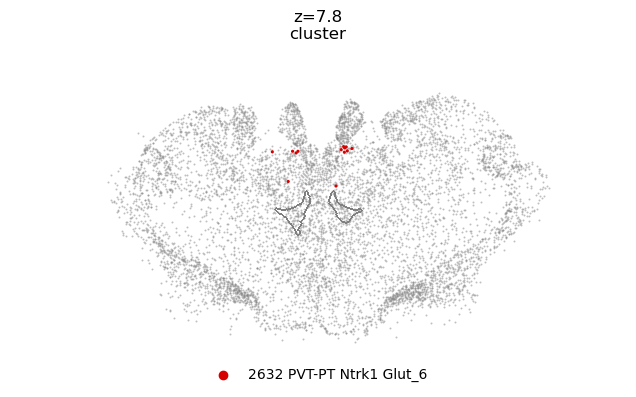

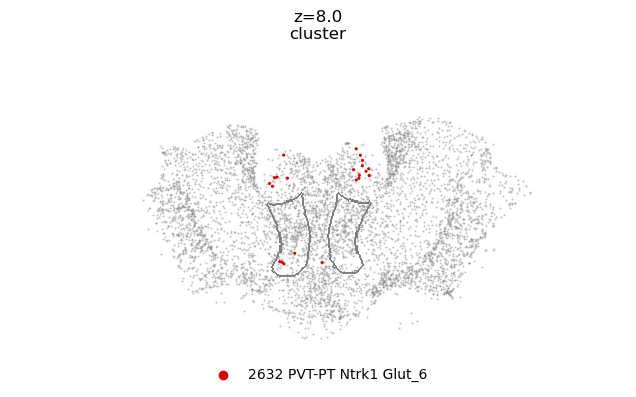

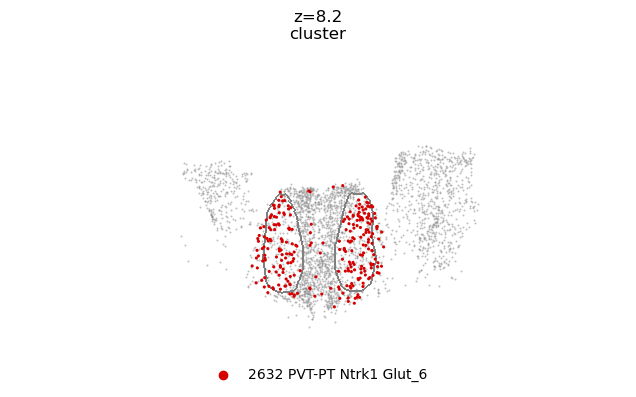

In [29]:
obs = get_obs_from_annotated_clusters('PT', adata_th_zi_neurons, nuclei_df)

cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei='PT', 
                                              legend='both', 
                                              bg_cells=obs_th_neurons, 
                                              bg_shapes=False, 
                                              shape_palette='dark_outline', s=5,
                                              section_col=section_col, 
                                              x_col=x_coord_col, y_col=y_coord_col)

## PT & PVT

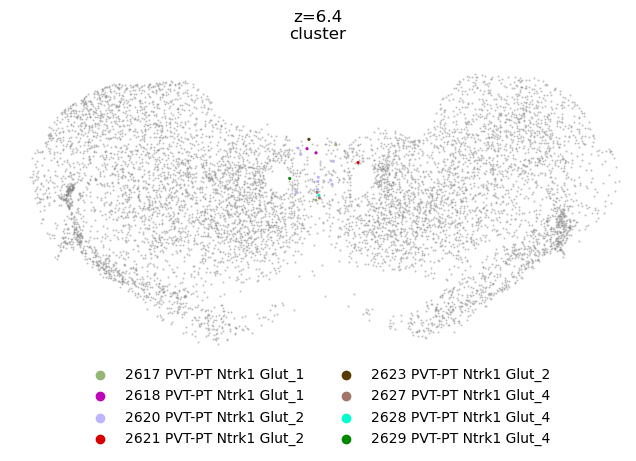

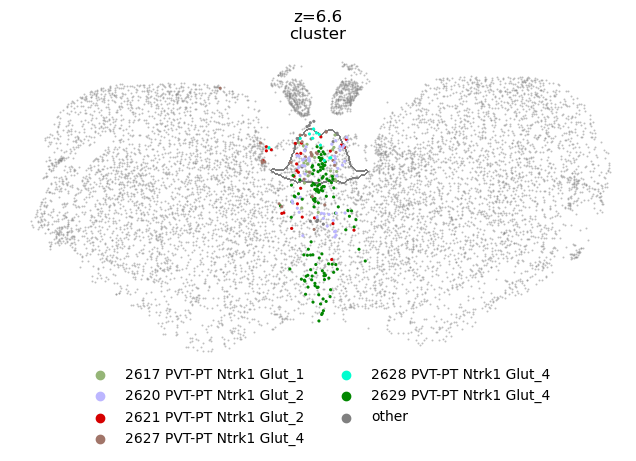

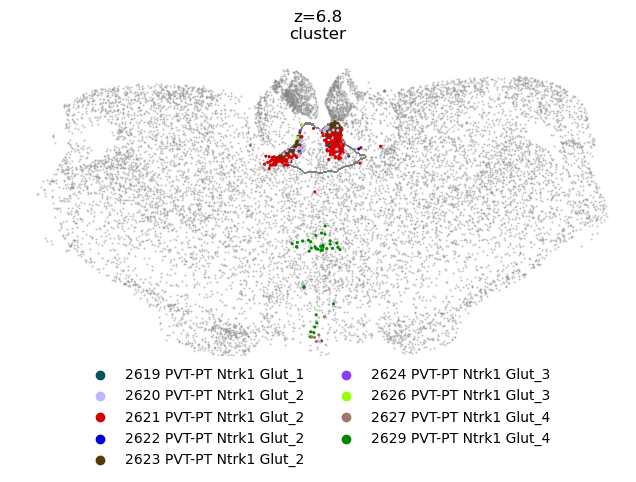

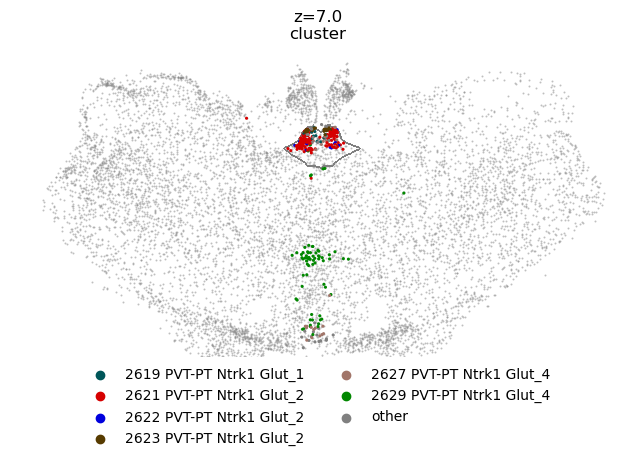

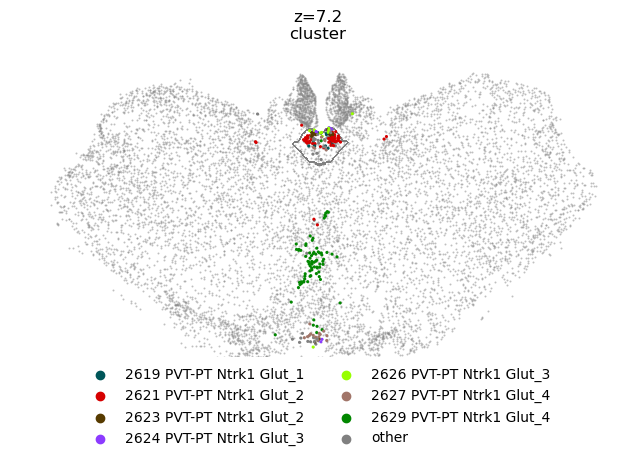

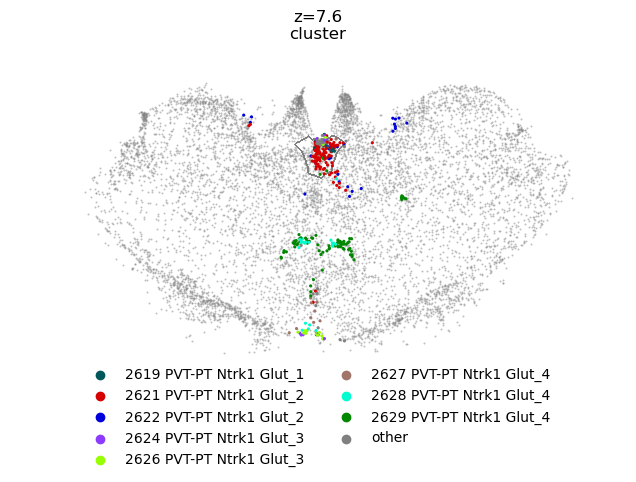

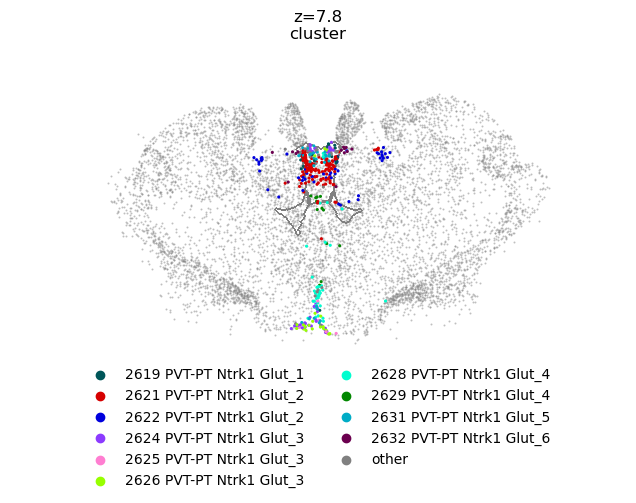

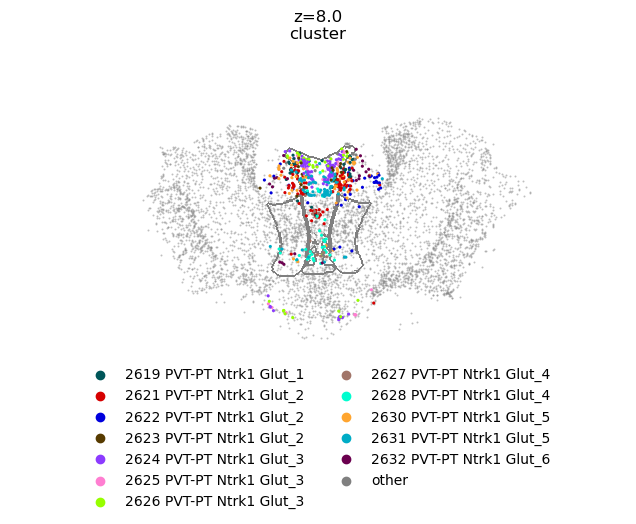

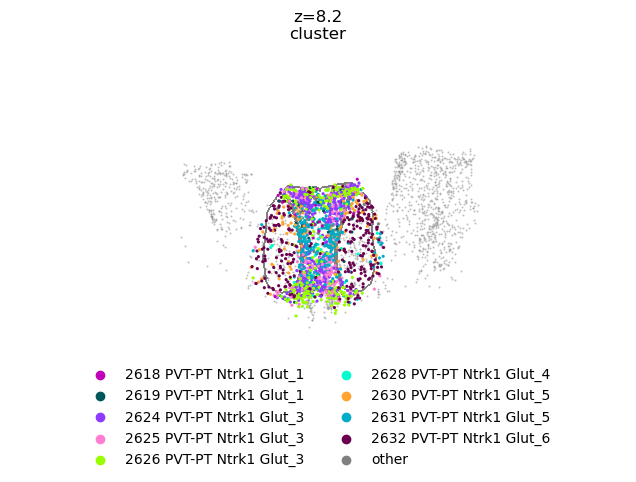

In [30]:
obs = adata_th_zi_neurons.obs.query("supertype.str.contains('PVT-PT')", engine='python')
cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei=['PT','PVT'], 
                                              legend='cells', 
                                              bg_cells=obs_th_neurons, 
                                              bg_shapes=False, 
                                              shape_palette='dark_outline', s=5,
                                              section_col=section_col, 
                                              x_col=x_coord_col, y_col=y_coord_col)

## PVT

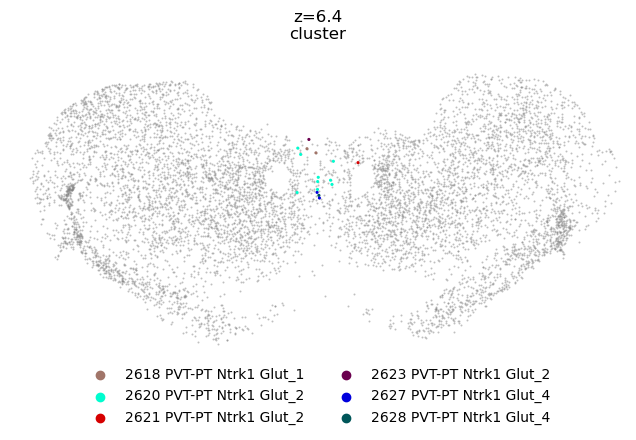

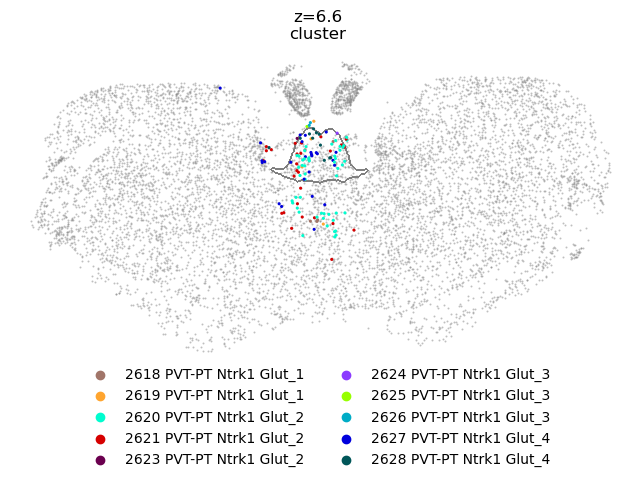

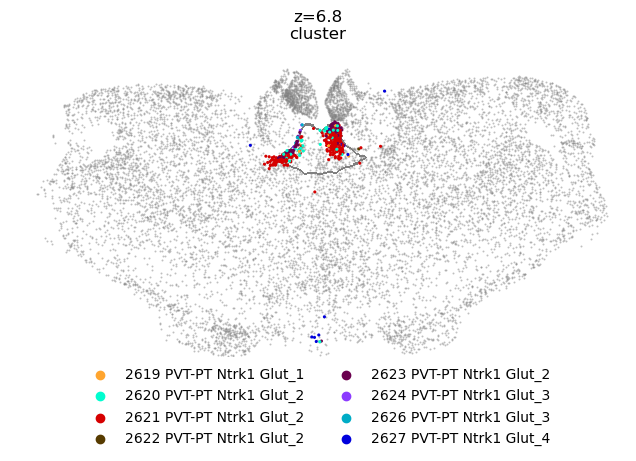

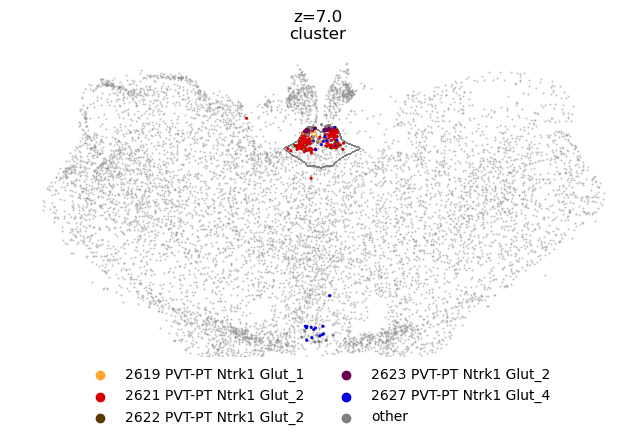

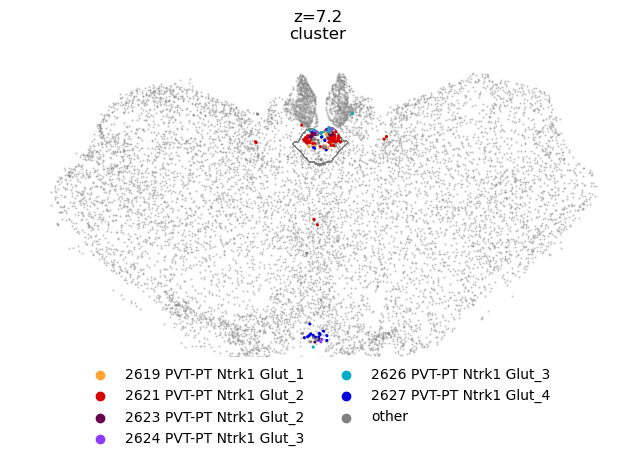

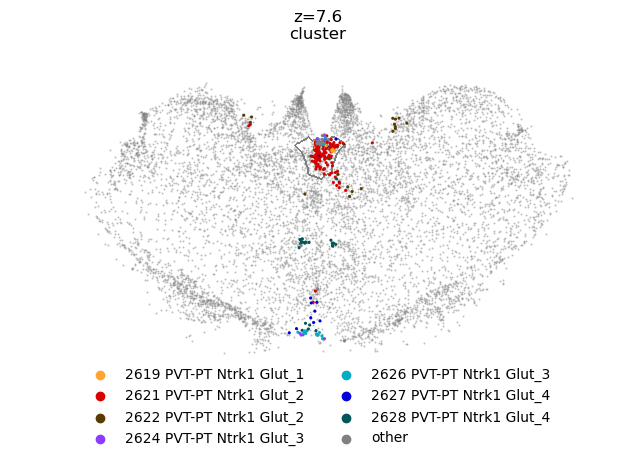

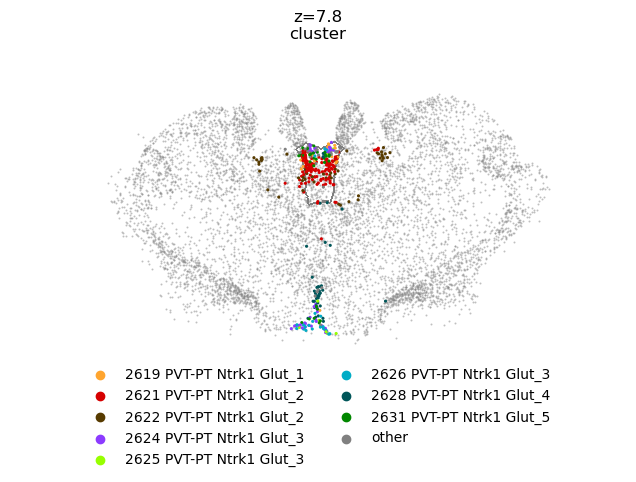

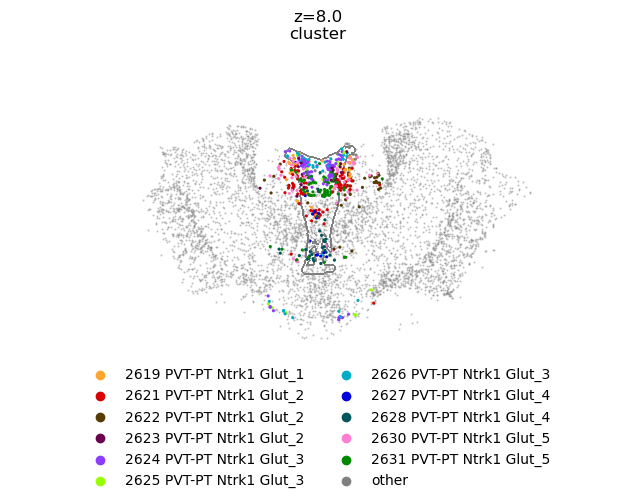

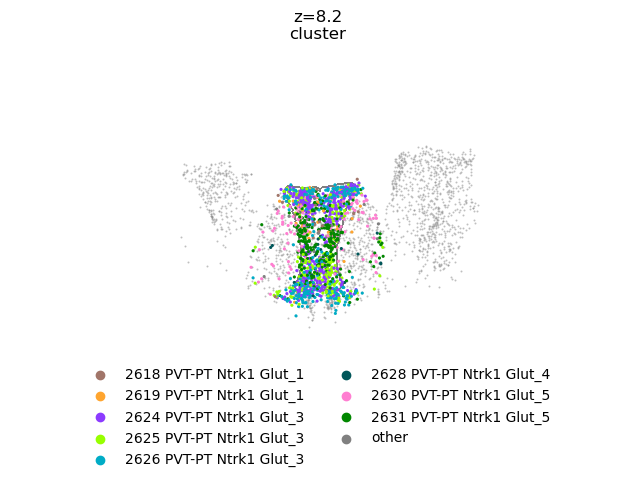

In [31]:
obs = get_obs_from_annotated_clusters('PVT', adata_th_zi_neurons, nuclei_df)
cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei=['PVT'], 
                                              legend='cells', 
                                              bg_cells=obs_th_neurons, 
                                              bg_shapes=False, 
                                              shape_palette='dark_outline', s=5,
                                              section_col=section_col, 
                                              x_col=x_coord_col, y_col=y_coord_col)

## LGd

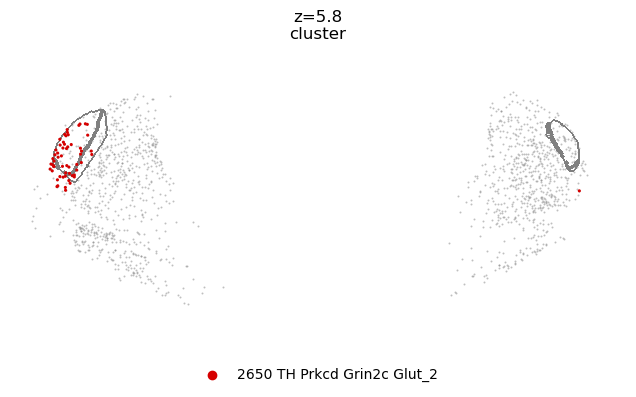

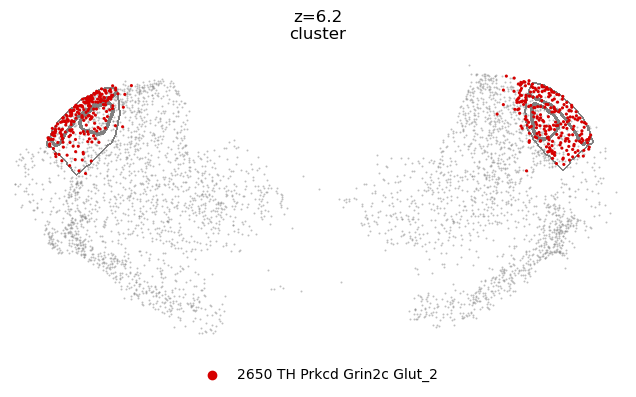

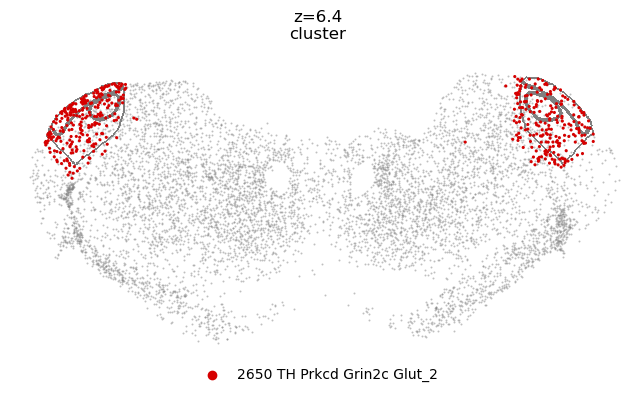

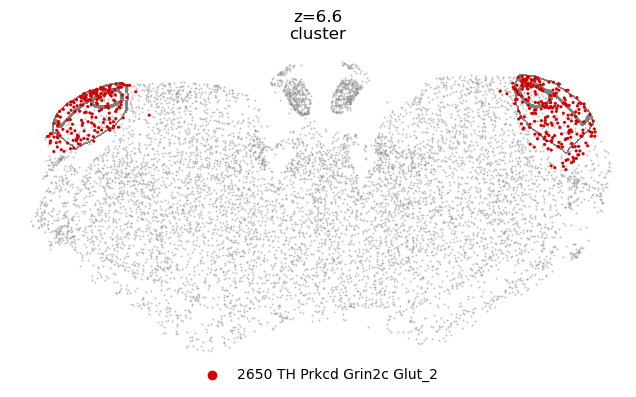

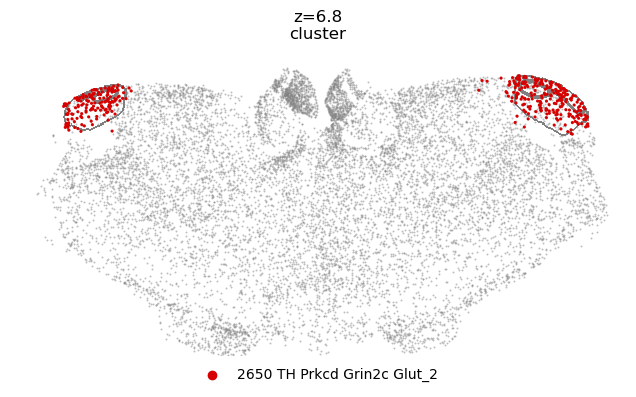

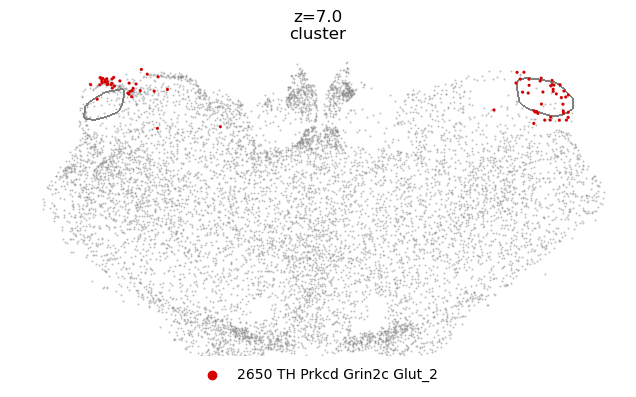

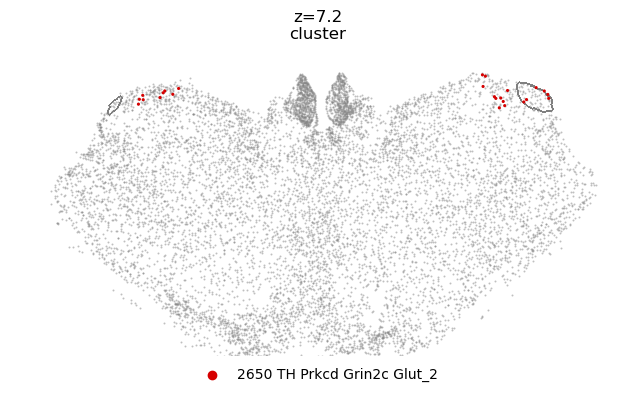

In [32]:
obs = get_obs_from_annotated_clusters('LGd', adata_th_zi_neurons, nuclei_df)
cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei=['LGd-co', 'LGd-ip', 'LGd-sh'], 
                                              legend='cells', 
                                              bg_cells=obs_th_neurons, 
                                              bg_shapes=False, 
                                              shape_palette='dark_outline', s=5,
                                              section_col=section_col, 
                                              x_col=x_coord_col, y_col=y_coord_col)

## SMT

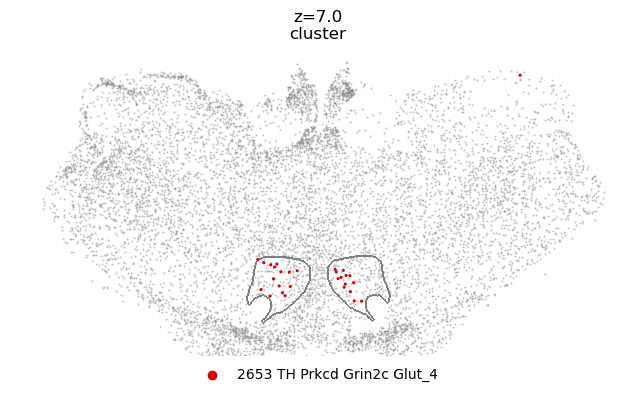

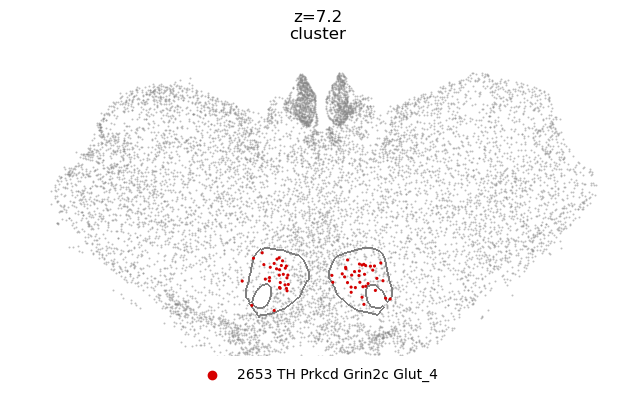

In [33]:
obs = get_obs_from_annotated_clusters('SMT', adata_th_zi_neurons, nuclei_df)
cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei='SMT', 
                                              legend='cells', 
                                              bg_cells=obs_th_neurons, 
                                              bg_shapes=False, 
                                              shape_palette='dark_outline', s=5,
                                              section_col=section_col, 
                                              x_col=x_coord_col, y_col=y_coord_col)

## LD

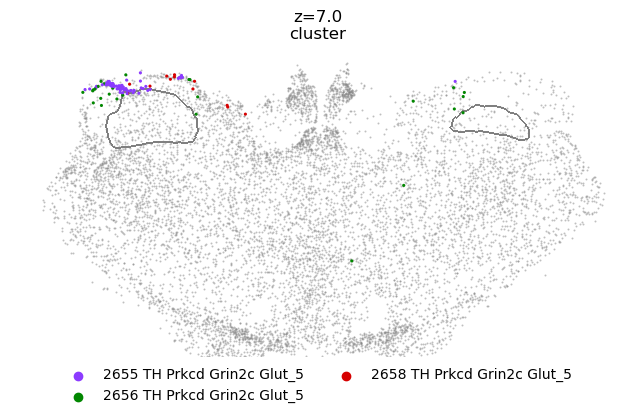

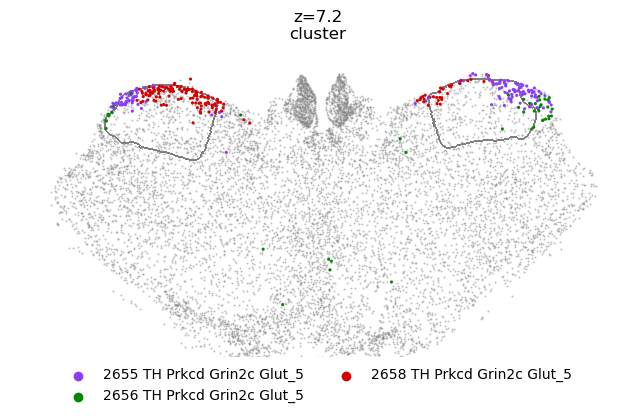

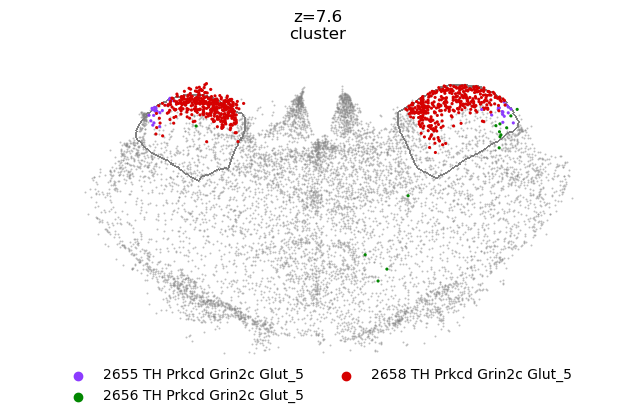

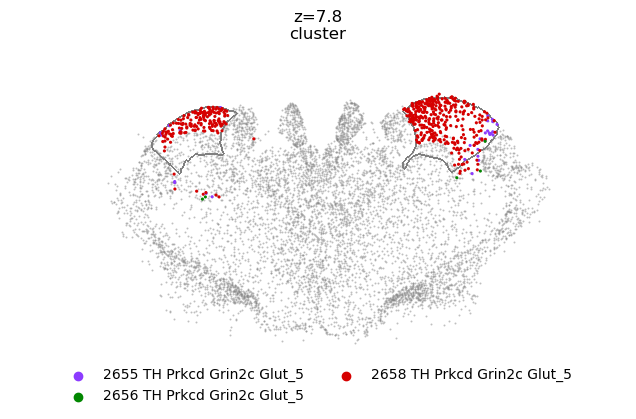

In [34]:
obs = get_obs_from_annotated_clusters('LD', adata_th_zi_neurons, nuclei_df)
cplots.plot_nucleus_cluster_comparison_slices(obs, ccf_polygons, nuclei='LD', 
                                              legend='cells', 
                                              bg_cells=obs_th_neurons, 
                                              bg_shapes=False, 
                                              shape_palette='dark_outline', s=5,
                                              section_col=section_col, 
                                              x_col=x_coord_col, y_col=y_coord_col)